## Spot Profiles

Originally written by Alex Broughton



In [1]:
! eups list -s | grep lsst_distrib
! eups list -s | grep cp_pipe
! eups list -s | grep ip_isr

lsst_distrib          g4213664e8e+995cec829e 	w_2023_29 setup
cp_pipe               LOCAL:/sdf/home/a/abrought/alternate_branches/dm_stack/cp_pipe 	setup
ip_isr                LOCAL:/sdf/home/a/abrought/alternate_branches/dm_stack/ip_isr 	setup


In [2]:
# Imports
import sys
sys.path.append('/sdf/home/a/abrought/bin')
from SpotAnalysis import *
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.pyplot import cm

#### Read Data

Import uncorrected and corrected:

In [5]:
# Use sensor data
sensor = "R03_S12"
detector = 23

# Butler repository
outdir = "/sdf/home/a/abrought/run5/BF/data/2023-07-19-fixedgainsbug/"

# Retrieve data
data_uncorrected = readData( outdir + "data_13248_R03_S12_2023-08-03T12:40:58_680nm_uncorrected.pkl", \
                             #outdir + "data_13247_R03_S12_2023-08-02T07:51:13_680nm_uncorrected.pkl", \
                             expstoremove=1)
data_corrected = readData(   #outdir + "data_13247_R03_S12_2023-02-21T17:25:21_680nm_corrected_max100kE_noQuadFit_corrModelr_3.pkl", \
                             outdir + "data_13248_R03_S12_2023-08-03T12:40:58_680nm_uncorrected.pkl", \
                             expstoremove=1)
                             #outdir + "data_13248_R03_S12_2022-10-03T18:35:57_680nm_corrected_craigs_rec.pkl", \



Removing SEQNUMs: 
221 21 321 142 

File 1
5.0s, 27 images
10.0s, 30 images
15.0s, 37 images
20.0s, 40 images
25.0s, 40 images
30.0s, 31 images
35.0s, 30 images
40.0s, 30 images
45.0s, 30 images
50.0s, 30 images


 325
Removing SEQNUMs: 
221 21 321 142 

File 1
5.0s, 27 images
10.0s, 30 images
15.0s, 37 images
20.0s, 40 images
25.0s, 40 images
30.0s, 31 images
35.0s, 30 images
40.0s, 30 images
45.0s, 30 images
50.0s, 30 images


 325


Import just one:

#### Plot time series data from the runs
(Check for data quality)

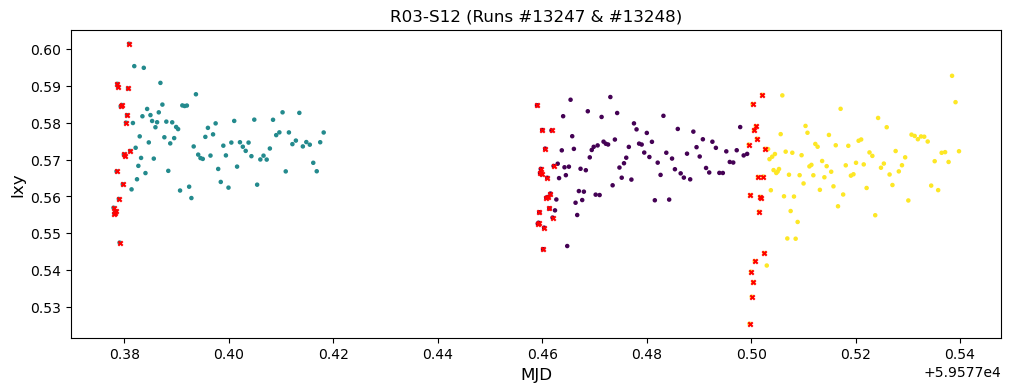

In [6]:
plotTimeSeries(data_uncorrected, y1key='Ixy', y2key='Ixy', sensor=sensor, runs="#13247 & #13248", fontsize=12)

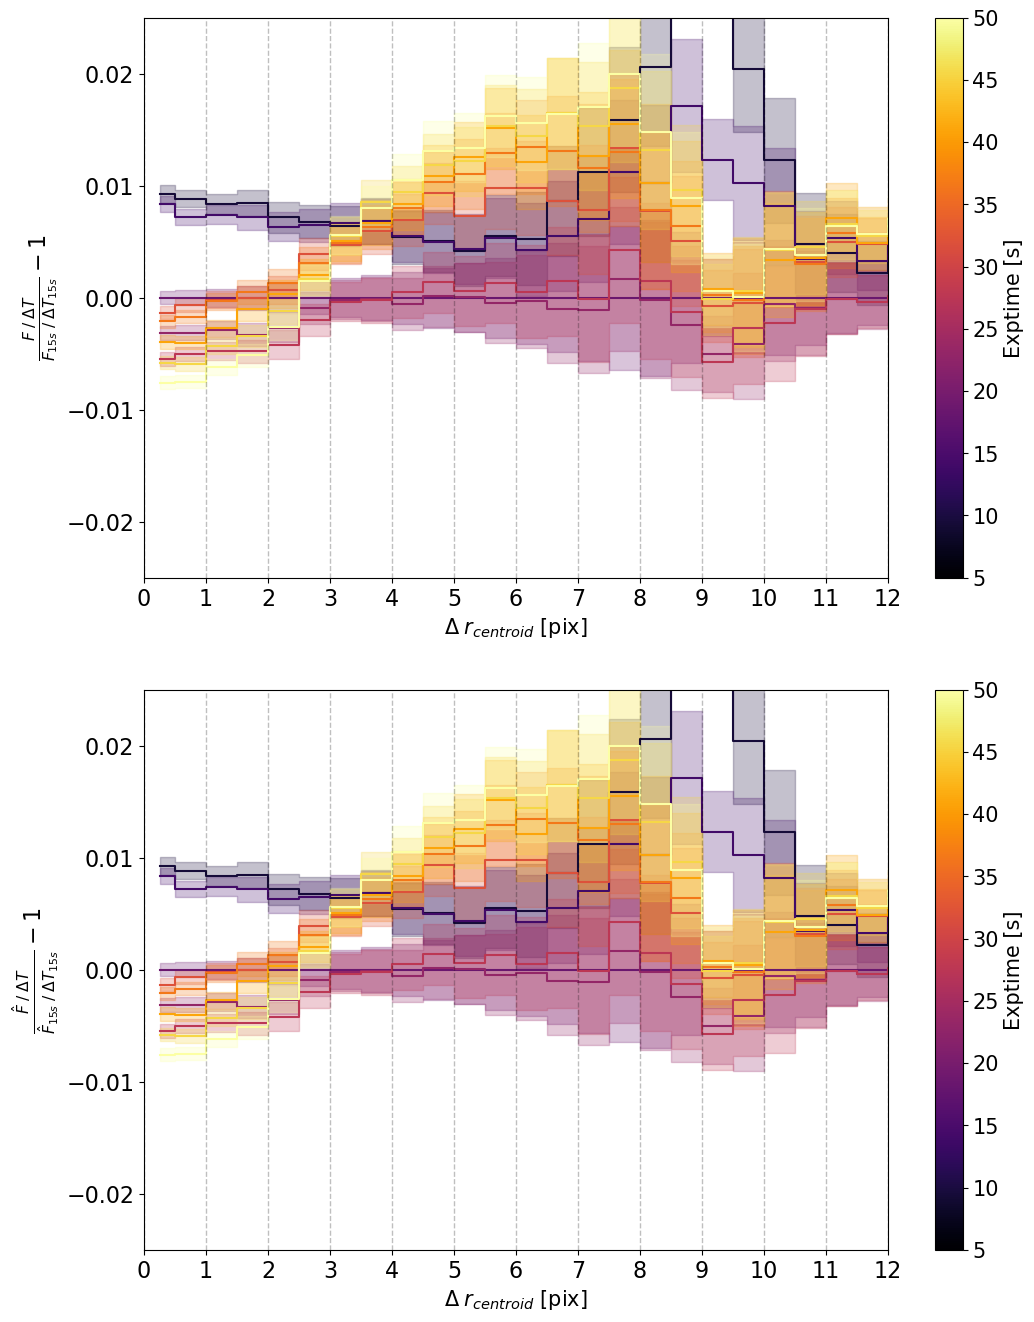

In [28]:
#plt.figure(figsize=(12,4), facecolor="w")
fig, (ax1,ax2) = plt.subplots(2,1,sharey=False,sharex=False, figsize=(12,16), facecolor="w")
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

exptimes = np.unique(data_corrected['exptime'])

exptimes = exptimes[(exptimes <= 50.)]

y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[np.asarray(data_uncorrected['exptime']) == exptime]
    bin_centers = np.linspace(0.25,31.75,64)
    #print(data_subset.columns)
    xs = []
    ys = []
    yerrs = []
    for exp in data_subset:
        corr_gains = exp['corresponding_gains'][np.newaxis].T
        x = np.nanmean(exp['radial_bin_centers'], axis=0)
        y = np.nanmean(exp['radial_profiles']* 1, axis=0)
        yerr = np.sqrt(np.nansum((exp['radial_profile_stddevs']* 1)**2, axis=0)) / np.sqrt(np.nansum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        xs.append(x)
        ys.append(y)
        yerrs.append(yerr)

    xs = np.asarray(xs)
    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.nanmean(ys, axis=0)
    yerrs2 = np.sqrt(np.nansum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    if exptime==15.0:
        y0 = ys2 / exptime


#y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    bin_centers = np.linspace(0.25,31.75,64)
    #print(data_subset.columns)
    xs = []
    ys = []
    yerrs = []
    for exp in data_subset:
        corr_gains = exp['corresponding_gains'][np.newaxis].T
        x = np.nanmean(exp['radial_bin_centers'], axis=0)
        y = np.nanmean(exp['radial_profiles'], axis=0)
        yerr = np.sqrt(np.nansum((exp['radial_profile_stddevs']* 1)**2, axis=0)) / np.sqrt(np.nansum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        xs.append(x)
        ys.append(y)
        yerrs.append(yerr)

    xs = np.asarray(xs)
    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.nanmean(ys, axis=0)
    yerrs2 = np.sqrt(np.nansum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==5.0:
    #    y0 = ys2 / exptime
    ax1.fill_between(bin_centers, y1=((ys2-yerrs2)/exptime - y0)/ y0, y2=((ys2+yerrs2)/exptime - y0)/ y0, step="mid", color=color,alpha=0.25)
    ax1.plot(bin_centers, (ys2 / exptime - y0) / y0, color=color,drawstyle="steps-mid")


y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_corrected[np.asarray(data_corrected['exptime']) == exptime]
    bin_centers = np.linspace(0.25,31.75,64)
    #print(data_subset.columns)
    xs = []
    ys = []
    yerrs = []
    for exp in data_subset:
        corr_gains = exp['corresponding_gains'][np.newaxis].T
        x = np.nanmean(exp['radial_bin_centers'], axis=0)
        y = np.nanmean(exp['radial_profiles']* 1, axis=0)
        yerr = np.sqrt(np.nansum((exp['radial_profile_stddevs']* 1)**2, axis=0)) / np.sqrt(np.nansum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        xs.append(x)
        ys.append(y)
        yerrs.append(yerr)

    xs = np.asarray(xs)
    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.nanmean(ys, axis=0)
    yerrs2 = np.sqrt(np.nansum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    if exptime==15.0:
        y0 = ys2 / exptime
    

for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_corrected[np.asarray(data_corrected['exptime']) == exptime]
    bin_centers = np.linspace(0.25,31.75,64)
    #print(data_subset.columns)
    ys = []
    yerrs = []
    for exp in data_subset:
        corr_gains = exp['corresponding_gains'][np.newaxis].T
        y = np.nanmean(exp['radial_profiles']* 1, axis=0)
        yerr = np.sqrt(np.nansum((exp['radial_profile_stddevs']* 1)**2, axis=0)) / np.sqrt(np.nansum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.append(y)
        yerrs.append(yerr)

    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.nanmean(ys, axis=0)
    yerrs2 = np.sqrt(np.nansum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==15.0:
    #     y0 = ys2 / exptime
    ax2.fill_between(bin_centers, y1=((ys2-yerrs2)/exptime - y0)/ y0, y2=((ys2+yerrs2)/exptime - y0)/ y0, step="mid", color=color,alpha=0.25)
    ax2.plot(bin_centers, (ys2 / exptime - y0) / y0, color=color,drawstyle="steps-mid")


#plt.yscale("log")
#plt.xticks(fontsize=16)
for l in np.linspace(0,33,34):
    ax1.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
    ax2.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_xlabel(r"$\Delta\;r_{centroid}$ [pix]")
ax2.set_xlabel(r"$\Delta\;r_{centroid}$ [pix]")
ax1.set_yticks([-0.02, -0.01,0.0,0.01,0.02])
ax2.set_yticks([-0.02, -0.01,0.0,0.01,0.02])
ax1.set_ylabel(r"$\frac{F\;/\;\Delta T}{F_{15s}\;/\;\Delta T_{15s}} - 1$", fontsize=16)
ax2.set_ylabel(r"$\frac{\hat{F}\;/\;\Delta T}{\hat{F}_{15s}\;/\;\Delta T_{15s}} - 1$", fontsize=16)
#plt.xscale("log")
#plt.yscale("log")
ax1.set_ylim(-0.025, 0.025)
ax2.set_ylim(-0.025, 0.025)
ax1.set_xlim(0., 12.)
ax2.set_xlim(0.,12.)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
import matplotlib as mpl
cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=np.min(exptimes), vmax=np.max(exptimes))
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1,label='Exptime [s]')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2,label='Exptime [s]')
#plt.xscale("log")



plt.savefig("../plots/spot_profile_corrected_uncorrected_R03_S12.png", bbox_inches="tight")
#F/dT - F/5sec              --- ADU /s
#(F/dT - F/5sec)*2pi r --
# (F/dT - F/5sec)/F/5sec.   --- % 

# Averaging Profiles

In [8]:
color = cm.inferno(exptime/np.max(exptimes))
exptime = 5
color = cm.inferno(exptime/np.max(exptimes))
data_subset = data_uncorrected[np.asarray(data_uncorrected['exptime']) == exptime]
bin_centers = np.linspace(0.25,31.75,64)
#print(data_subset.columns)
xs = np.full((1,64), np.nan)
ys = np.full((1,64), np.nan)
yerrs = np.full((1,64), np.nan)
for exp in data_subset:
    xs = np.concatenate((xs, exp['radial_bin_centers']), axis=0)
    ys = np.concatenate((xs, exp['radial_profiles']), axis=0)

for row in 

plt.plot(x,y/exptime, color=color, drawstyle="steps-mid")
#plt.fill_between(x, y1 = y - yerr/np.sqrt(n),y2 = y + yerr/np.sqrt(n),color=color, step="mid", alpha=0.25)

plt.yscale('log')
plt.ylabel("$F/\Delta T$")
plt.xlabel("px")
#plt.xscale('log')

SyntaxError: invalid syntax (2195725565.py, line 14)

Text(0.5, 0, 'px')

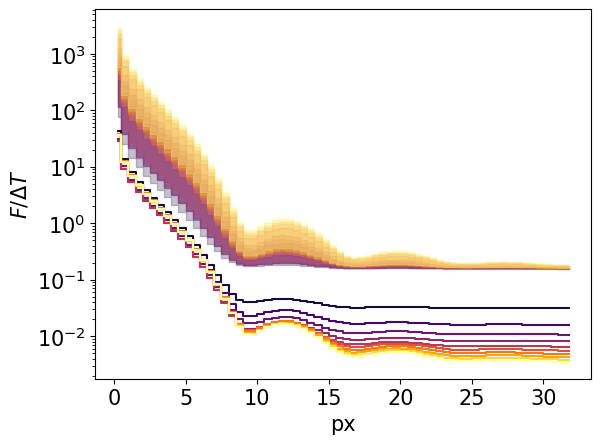

In [27]:
color = cm.inferno(exptime/np.max(exptimes))
exptime = 5
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[np.asarray(data_uncorrected['exptime']) == exptime]
    bin_centers = np.linspace(0.25,31.75,64)
    #print(data_subset.columns)
    xs = np.full((1,64), np.nan)
    ys = np.full((1,64), np.nan)
    yerrs = np.full((1,64), np.nan)
    for exp in data_subset:
        xs = np.concatenate((xs, exp['radial_bin_centers']), axis=0)
        ys = np.concatenate((xs, exp['radial_profiles']), axis=0)

    x = np.nanmean(xs, axis=0)
    y = np.nanmean(ys, axis=0) / (2*np.pi*x)
    xerr = np.nanstd(xs, axis=0)
    yerr = np.nanstd(ys / (2*np.pi*x), axis=0)
    n = y.shape[0]

    plt.plot(x,(y/exptime), color=color, drawstyle="steps-mid")
    plt.fill_between(x, y1 = y - yerr/np.sqrt(n),y2 = y + yerr/np.sqrt(n),color=color, step="mid", alpha=0.25)

plt.yscale('log')
plt.ylabel("$F/\Delta T$")
plt.xlabel("px")
#plt.xscale('log')

# Old

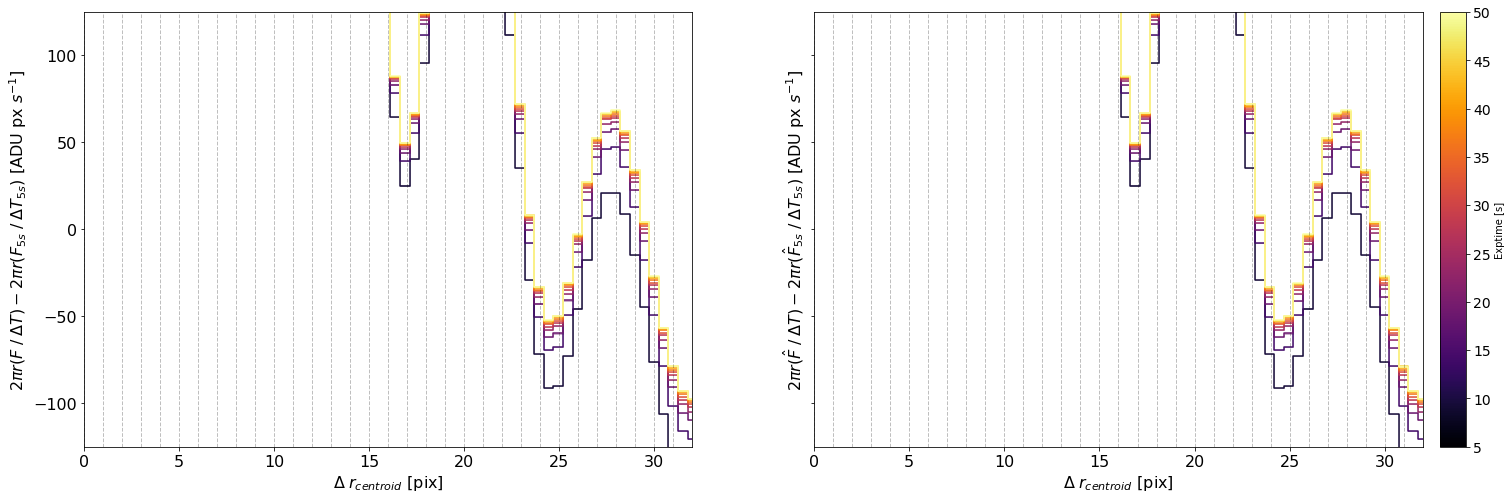

In [9]:
#fig = plt.figure(figsize=(12,8), facecolor="w")
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,sharex=True, figsize=(24,8), facecolor="w")
exptimes = np.unique(data_uncorrected['exptime'])


y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    bin_centers = np.linspace(0.25,int(65/2.),64)
    #print(data_subset.columns)
    ys = []
    yerrs = []
    for exp in data_subset:
        y = np.mean(exp['radial_profiles'], axis=0)
        yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.append(y)
        yerrs.append(yerr)

    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.mean(ys, axis=0) * 2*np.pi*bin_centers
    yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    if exptime==15.0:
        y0 = ys2 / exptime
    #ax1.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    #ax1.plot(bin_centers, ys2 /exptime - y0, color=color,drawstyle="steps-mid")

y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    bin_centers = np.linspace(0.25,int(65/2.),64)
    #print(data_subset.columns)
    ys = []
    yerrs = []
    for exp in data_subset:
        y = np.mean(exp['radial_profiles'], axis=0)
        yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.append(y)
        yerrs.append(yerr)

    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.mean(ys, axis=0) * 2*np.pi*bin_centers
    yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==15.0:
    #    y0 = ys2 / exptime
    ax1.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    ax1.plot(bin_centers, ys2 /exptime - y0, color=color,drawstyle="steps-mid")
    
    

#plt.yscale("log")
#ax1.set_xticks(fontsize=16)
for l in np.linspace(0,33,34):
    ax1.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
ax1.set_xlabel(r"$\Delta\;r_{centroid}$ [pix]", fontsize=16)
#ax1.set_yticks(fontsize=16)
ax1.set_ylabel(r"$F\;/\;\Delta T - F_{5s}\;/\;\Delta T_{5s}$ [ADU $s^{-1}$]", fontsize=16)
#plt.xscale("log")
#plt.yscale("log")
plt.ylim(-125, 125)
#plt.xlim(0., 15)
#plt.xscale("log")



for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_corrected[data_corrected['exptime'] == exptime]
    bin_centers = np.linspace(0.25,int(65/2.),64)
    #print(data_subset.columns)
    ys = []
    yerrs = []
    for exp in data_subset:
        y = np.mean(exp['radial_profiles'], axis=0)
        yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.append(y)
        yerrs.append(yerr)

    ys = np.asarray(ys)
    yerrs = np.asarray(yerrs)
    ys2 = np.mean(ys, axis=0) * 2*np.pi*bin_centers
    yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==5.0:
    #    y0 = ys2 / exptime
    ax2.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    ax2.plot(bin_centers, ys2 /exptime - y0, color=color,drawstyle="steps-mid")
    
    

#plt.yscale("log")
#ax2.set_xticks(fontsize=16)
for l in np.linspace(0,33,34):
    ax2.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
ax2.set_xlabel(r"$\Delta\;r_{centroid}$ [pix]", fontsize=16)
#ax2.set_yticks(fontsize=16)
ax1.set_ylabel(r"$2\pi r(F\;/\;\Delta T) - 2\pi r(F_{5s}\;/\;\Delta T_{5s})$ [ADU px $s^{-1}$]", fontsize=16)
ax2.set_ylabel(r"$2\pi r(\hat{F}\;/\;\Delta T) - 2\pi r(\hat{F}_{5s}\;/\;\Delta T_{5s})$ [ADU px $s^{-1}$]", fontsize=16)
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(-125, 125)
plt.xlim(0., 32)
#plt.xscale("log")


ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)


import matplotlib as mpl
cmap = mpl.cm.inferno
norm = mpl.colors.Normalize(vmin=np.min(exptimes), vmax=np.max(exptimes))
cax = fig.add_axes([0.91, .125, 0.015, 0.755])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax, label='Exptime [s]')
cbar.ax.tick_params(labelsize=14)
plt.savefig("../plots/spot_profile_R03_S12.png", bbox_inches="tight")

Text(0, 0.5, '$ADU\\;(Parallel - Serial) / \\Delta T$')

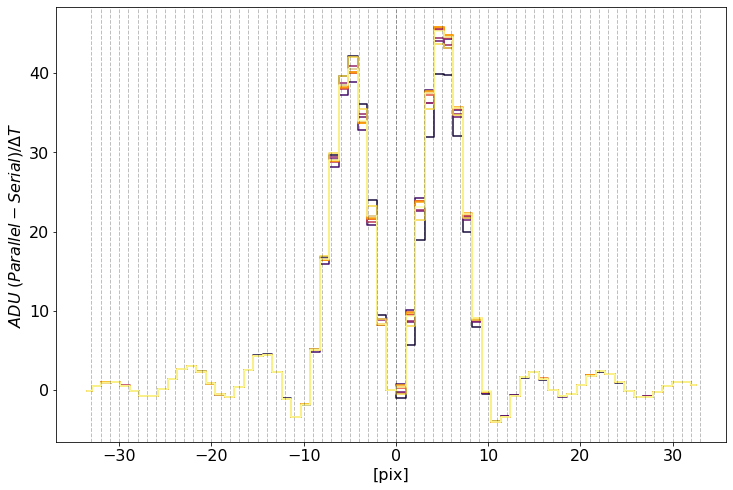

In [13]:
plt.figure(figsize=(12,8), facecolor="w")
exptimes = np.unique(data_corrected['exptime'])

y0 = np.zeros((64,))
for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_corrected[data_corrected['exptime'] == exptime]
    data_ref = data_corrected[data_corrected['exptime'] == 5.]
    bin_centers = np.linspace(-33,33,data_subset[0]['serial_slice'].shape[1])
    #print(data_subset.columns)
    ys = []
    yerrs = []
    ref = np.mean(data_ref[0]['serial_slice'], axis=0)
    for exp in data_subset:
        #print(exp['parallel_slice'])
        #print(exp['parallel_slice'].shape)
        y = np.mean(exp['parallel_slice'], axis=0) - np.mean(exp['serial_slice'], axis=0)#- np.flip(np.mean(exp['parallel_slice'], axis=0))# - ref
        #yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.append(y)
        #yerrs.append(yerr)

    ys = np.asarray(ys)
    #yerrs = np.asarray(yerrs)
    ys2 = np.mean(ys, axis=0)
    #yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    if exptime==5.0:
        y0 = ys2 - np.flip(ys2)
    #plt.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    plt.plot(bin_centers-0.5, ys2 / exptime, color=color,drawstyle="steps-mid")
    #print(ys2 / exptime)
    
    

#plt.yscale("log")
plt.xticks(fontsize=16)
for l in np.linspace(0,33,34):
    plt.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
    plt.axvline(-l, linestyle="--", linewidth=1, color="k", alpha=0.25)
plt.xlabel(r"[pix]", fontsize=16)
plt.yticks(fontsize=16)
#plt.semilogy()
plt.ylabel(r"$ADU\;(Parallel - Serial) / \Delta T$", fontsize=16)
#plt.xlim(0,30)
#plt.yscale("log")
#plt.ylim(-50, 200)
#plt.xlim(0., 15)
#plt.xscale("log")



0


TypeError: Colorbar.__init__() got an unexpected keyword argument 'range'

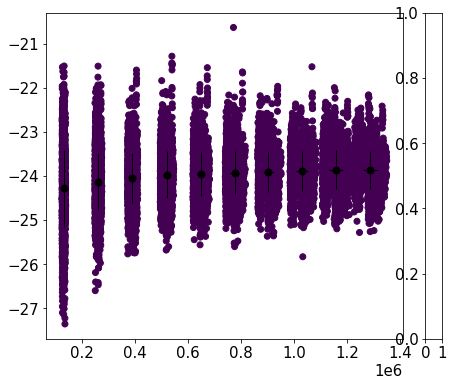

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,6), facecolor="w")
exptimes = np.unique(data_corrected['exptime'])

y0 = np.zeros((64,))
val = []

for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    data_ref = data_uncorrected[data_uncorrected['exptime'] == 5.]

    bin_centers = np.linspace(-33,33,data_subset[0]['serial_slice'].shape[1])
    #print(data_subset.columns)
    xs = []
    ys = []
    yerrs = []
    ref = np.mean(data_ref[0]['serial_slice'], axis=0)
    for exp in data_subset:
        #print(exp['parallel_slice'])
        #print(exp['parallel_slice'].shape)
        #print(len(exp['a']))
        #y = (exp['a'] - exp['b']) / (exp['a'] + exp['b'])
        
        y = (np.arctan((2 * exp['Ixy']) / (exp['Ixx'] - exp['Iyy'])) / 2.) * (180./np.pi) #- np.flip(np.mean(exp['parallel_slice'], axis=0))# - ref
        #yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.extend(y)
        xs.extend(exp['base_PsfFlux_instFlux'])
        #yerrs.append(yerr)

    xs = np.asarray(xs)
    ys = np.asarray(ys)
    plt.scatter(xs, ys, c=[exptime for i in range (len( ys))], cmap="inferno", vmin = np.min(exptimes), vmax = np.max(exptimes))
    plt.errorbar([np.mean(xs)], [np.mean(ys)], xerr=[np.std(xs)], yerr=[np.std(ys)], fmt="o", markersize=7, capthick=15, color="k", elinewidth=1.)
    #yerrs = np.asarray(yerrs)
    #ys2 = np.mean(ys, axis=0)
    #yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==5.0:
    #    y0 = ys2 - np.flip(ys2)
    #plt.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    #val.extend(ys)
    #print(ys2 / exptime)
    
#plt.hist(val, bins=100)
print(len(val))

#plt.yscale("log")
#plt.ylim(60,72)
#plt.xticks(fontsize=15)
#import matplotlib as mpl
#cmap = mpl.cm.inferno
#norm = mpl.colors.Normalize(vmin=np.min(exptimes), vmax=np.max(exptimes))
#cax = fig.add_axes([.91, 0.125, 0.012, 0.755])
#plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#             cax=cax, label='Exptime [s]')
plt.colorbar(label="Exptime [s]")
#for l in np.linspace(0,33,34):
#    plt.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
#    plt.axvline(-l, linestyle="--", linewidth=1, color="k", alpha=0.25)
plt.xlabel(r"Integrated Flux [ADU]")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.semilogy()
plt.ylabel(r"$\theta$ [deg]", fontsize=15)
#plt.xlim(0,30)
#plt.yscale("log")
#plt.ylim(-50, 200)
#plt.xlim(0., 15)
#plt.xscale("log")
plt.savefig("../plots/angle.png", bbox_inches="tight")


109709


Text(0, 0.5, 'samples/bin')

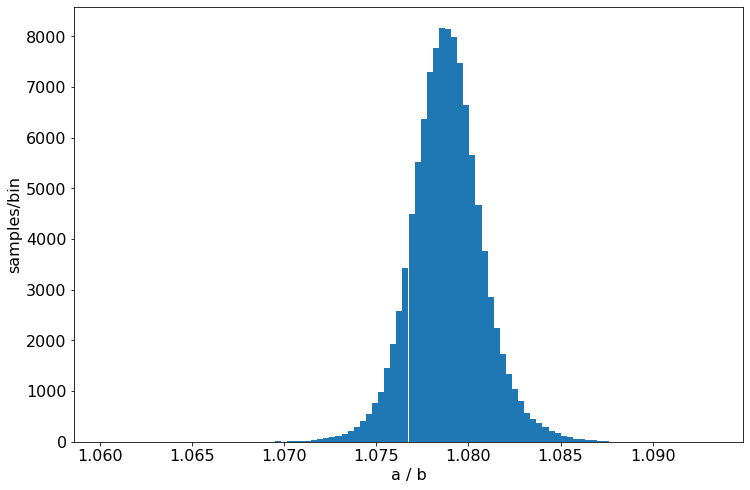

In [80]:
plt.figure(figsize=(12,8), facecolor="w")
exptimes = np.unique(data_corrected['exptime'])

y0 = np.zeros((64,))
val = []

for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    data_ref = data_uncorrected[data_uncorrected['exptime'] == 5.]
    bin_centers = np.linspace(-33,33,data_subset[0]['serial_slice'].shape[1])
    #print(data_subset.columns)
    ys = []
    yerrs = []
    ref = np.mean(data_ref[0]['serial_slice'], axis=0)
    for exp in data_subset:
        #print(exp['parallel_slice'])
        #print(exp['parallel_slice'].shape)
        #print(len(exp['a']))
        y = (exp['a']) / (exp['b'])#- np.flip(np.mean(exp['parallel_slice'], axis=0))# - ref
        #yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.extend(y)
        #yerrs.append(yerr)

    ys = np.asarray(ys)
    #yerrs = np.asarray(yerrs)
    #ys2 = np.mean(ys, axis=0)
    #yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==5.0:
    #    y0 = ys2 - np.flip(ys2)
    #plt.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    val.extend(ys)
    #print(ys2 / exptime)
    
plt.hist(val, bins=100)
print(len(val))

#plt.yscale("log")
plt.xticks(fontsize=16)
#for l in np.linspace(0,33,34):
#    plt.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
#    plt.axvline(-l, linestyle="--", linewidth=1, color="k", alpha=0.25)
plt.xlabel(r"a / b", fontsize=16)
plt.yticks(fontsize=16)
#plt.semilogy()
plt.ylabel("samples/bin", fontsize=16)
#plt.xlim(0,30)
#plt.yscale("log")
#plt.ylim(-50, 200)
#plt.xlim(0., 15)
#plt.xscale("log")



30264


Text(0, 0.5, 'samples/bin')

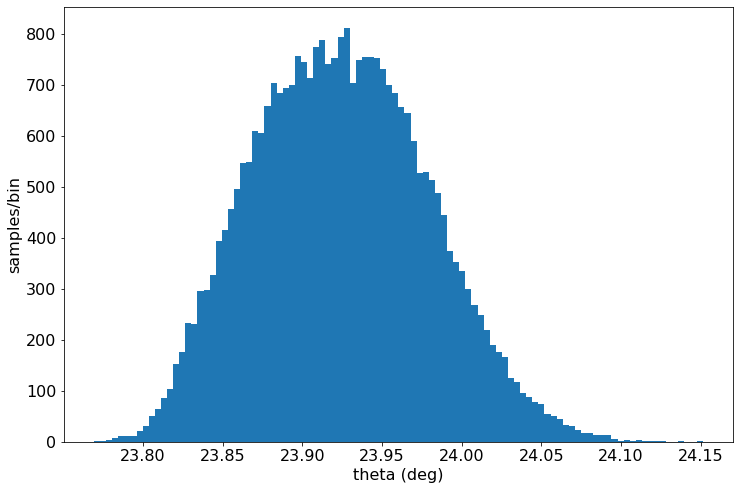

In [7]:
plt.figure(figsize=(12,8), facecolor="w")
exptimes = np.unique(data_corrected['exptime'])

y0 = np.zeros((64,))
val = []

for exptime in exptimes:
    color = cm.inferno(exptime/np.max(exptimes))
    data_subset = data_uncorrected[data_uncorrected['exptime'] == exptime]
    data_ref = data_uncorrected[data_uncorrected['exptime'] == 5.]
    bin_centers = np.linspace(-33,33,data_subset[0]['serial_slice'].shape[1])
    #print(data_subset.columns)
    ys = []
    yerrs = []
    ref = np.mean(data_ref[0]['serial_slice'], axis=0)
    for exp in data_subset:
        #print(exp['parallel_slice'])
        #print(exp['parallel_slice'].shape)
        #print(len(exp['a']))
        y = (180./np.pi) * np.arctan(exp['a']) / (exp['b'])#- np.flip(np.mean(exp['parallel_slice'], axis=0))# - ref
        #yerr = np.sqrt(np.sum(exp['radial_profile_stddevs']**2, axis=0)) / np.sqrt(np.sum(exp['nrs'], axis=0) * len(exp['radial_profiles']))
        ys.extend(y)
        #yerrs.append(yerr)

    ys = np.asarray(ys)
    #yerrs = np.asarray(yerrs)
    #ys2 = np.mean(ys, axis=0)
    #yerrs2 = np.sqrt(np.sum(yerrs**2, axis=0)) / np.sqrt(len(data_subset))
    #if exptime==5.0:
    #    y0 = ys2 - np.flip(ys2)
    #plt.fill_between(bin_centers, y1=(ys2-yerrs2)/exptime - y0, y2=(ys2+yerrs2)/exptime - y0, step="mid", color=color,alpha=0.25)
    val.extend(ys)
    #print(ys2 / exptime)
    
plt.hist(val, bins=100)
print(len(val))

#plt.yscale("log")
plt.xticks(fontsize=16)
#for l in np.linspace(0,33,34):
#    plt.axvline(l, linestyle="--", linewidth=1, color="k", alpha=0.25)
#    plt.axvline(-l, linestyle="--", linewidth=1, color="k", alpha=0.25)
plt.xlabel(r"theta (deg)", fontsize=16)
plt.yticks(fontsize=16)
#plt.semilogy()
plt.ylabel("samples/bin", fontsize=16)
#plt.xlim(0,30)
#plt.yscale("log")
#plt.ylim(-50, 200)
#plt.xlim(0., 15)
#plt.xscale("log")

